In [1]:
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import seaborn as sns 
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
 #sklearn preproc
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer, make_column_selector
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import RobustScaler, OneHotEncoder, OrdinalEncoder
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [3]:
pip install xgboost

You should consider upgrading via the '/home/sumedha/.pyenv/versions/lewagon/envs/covid_tsp_env/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [4]:
data_index=pd.read_csv('../raw_data/out_csv/index_UK.csv')

In [5]:
data_indicator=pd.read_csv('../raw_data/out_csv/indicator_UK.csv')

In [6]:
data_indicator=data_indicator.set_index('date')

In [7]:
data_indicator.head()

cancel_public_events  school_closing  restrictions_on_gathering  \
date                                                                          
2020-01-30                   0.0             0.0                        0.0   
2020-01-31                   0.0             0.0                        0.0   
2020-02-01                   0.0             0.0                        0.0   
2020-02-02                   0.0             0.0                        0.0   
2020-02-03                   0.0             0.0                        0.0   

            close_public_transport  stay_at_home_requirements  \
date                                                            
2020-01-30                     0.0                        0.0   
2020-01-31                     0.0                        0.0   
2020-02-01                     0.0                        0.0   
2020-02-02                     0.0                        0.0   
2020-02-03                     0.0                        0.0   

            restrictions_on_internal_movement  international_travel_controls  \
date                                                                           
2020-01-30                                0.0                            0.0   
2020-01-31                                0.0                            0.0   
2020-02-01                                0.0                            0.0   
2020-02-02                                0.0                            0.0   
2020-02-03                                0.0                            0.0   

            income_support  debt/contract_relief  \
date                                               
2020-01-30             0.0                   0.0   
2020-01-31             0.0                   0.0   
2020-02-01             0.0                   0.0   
2020-02-02             0.0                   0.0   
2020-02-03             0.0                   0.0   

            public_information_campaigns  ...  protection_of_elderly_people  \
date                                      ...                                 
2020-01-30                           1.0  ...                           0.0   
2020-01-31                           1.0  ...                           0.0   
2020-02-01                           1.0  ...                           0.0   
2020-02-02                           2.0  ...                           0.0   
2020-02-03                           2.0  ...                           0.0   

            total_cases  new_cases  total_deaths  new_deaths  \
date                                                           
2020-01-30          4.0        4.0           1.0         1.0   
2020-01-31          6.0        2.0           1.0         0.0   
2020-02-01          6.0        0.0           1.0         0.0   
2020-02-02         10.0        4.0           2.0         1.0   
2020-02-03         88.0       78.0           2.0         0.0   

            workplace_closing  total_vaccinations  people_vaccinated  \
date                                                                   
2020-01-30                0.0                 0.0                0.0   
2020-01-31                0.0                 0.0                0.0   
2020-02-01                0.0                 0.0                0.0   
2020-02-02                0.0                 0.0                0.0   
2020-02-03                0.0                 0.0                0.0   

            people_fully_vaccinated  total_boosters  
date                                                 
2020-01-30                      0.0             0.0  
2020-01-31                      0.0             0.0  
2020-02-01                      0.0             0.0  
2020-02-02                      0.0             0.0  
2020-02-03                      0.0             0.0  

[5 rows x 24 columns]

In [8]:
data_indicator=data_indicator[~(data_indicator.index < '2020-01-30')]
data_indicator=data_indicator[~(data_indicator.index > '2022-08-31')]

In [9]:
data_indicator.head()

cancel_public_events  school_closing  restrictions_on_gathering  \
date                                                                          
2020-01-30                   0.0             0.0                        0.0   
2020-01-31                   0.0             0.0                        0.0   
2020-02-01                   0.0             0.0                        0.0   
2020-02-02                   0.0             0.0                        0.0   
2020-02-03                   0.0             0.0                        0.0   

            close_public_transport  stay_at_home_requirements  \
date                                                            
2020-01-30                     0.0                        0.0   
2020-01-31                     0.0                        0.0   
2020-02-01                     0.0                        0.0   
2020-02-02                     0.0                        0.0   
2020-02-03                     0.0                        0.0   

            restrictions_on_internal_movement  international_travel_controls  \
date                                                                           
2020-01-30                                0.0                            0.0   
2020-01-31                                0.0                            0.0   
2020-02-01                                0.0                            0.0   
2020-02-02                                0.0                            0.0   
2020-02-03                                0.0                            0.0   

            income_support  debt/contract_relief  \
date                                               
2020-01-30             0.0                   0.0   
2020-01-31             0.0                   0.0   
2020-02-01             0.0                   0.0   
2020-02-02             0.0                   0.0   
2020-02-03             0.0                   0.0   

            public_information_campaigns  ...  protection_of_elderly_people  \
date                                      ...                                 
2020-01-30                           1.0  ...                           0.0   
2020-01-31                           1.0  ...                           0.0   
2020-02-01                           1.0  ...                           0.0   
2020-02-02                           2.0  ...                           0.0   
2020-02-03                           2.0  ...                           0.0   

            total_cases  new_cases  total_deaths  new_deaths  \
date                                                           
2020-01-30          4.0        4.0           1.0         1.0   
2020-01-31          6.0        2.0           1.0         0.0   
2020-02-01          6.0        0.0           1.0         0.0   
2020-02-02         10.0        4.0           2.0         1.0   
2020-02-03         88.0       78.0           2.0         0.0   

            workplace_closing  total_vaccinations  people_vaccinated  \
date                                                                   
2020-01-30                0.0                 0.0                0.0   
2020-01-31                0.0                 0.0                0.0   
2020-02-01                0.0                 0.0                0.0   
2020-02-02                0.0                 0.0                0.0   
2020-02-03                0.0                 0.0                0.0   

            people_fully_vaccinated  total_boosters  
date                                                 
2020-01-30                      0.0             0.0  
2020-01-31                      0.0             0.0  
2020-02-01                      0.0             0.0  
2020-02-02                      0.0             0.0  
2020-02-03                      0.0             0.0  

[5 rows x 24 columns]

<AxesSubplot:>

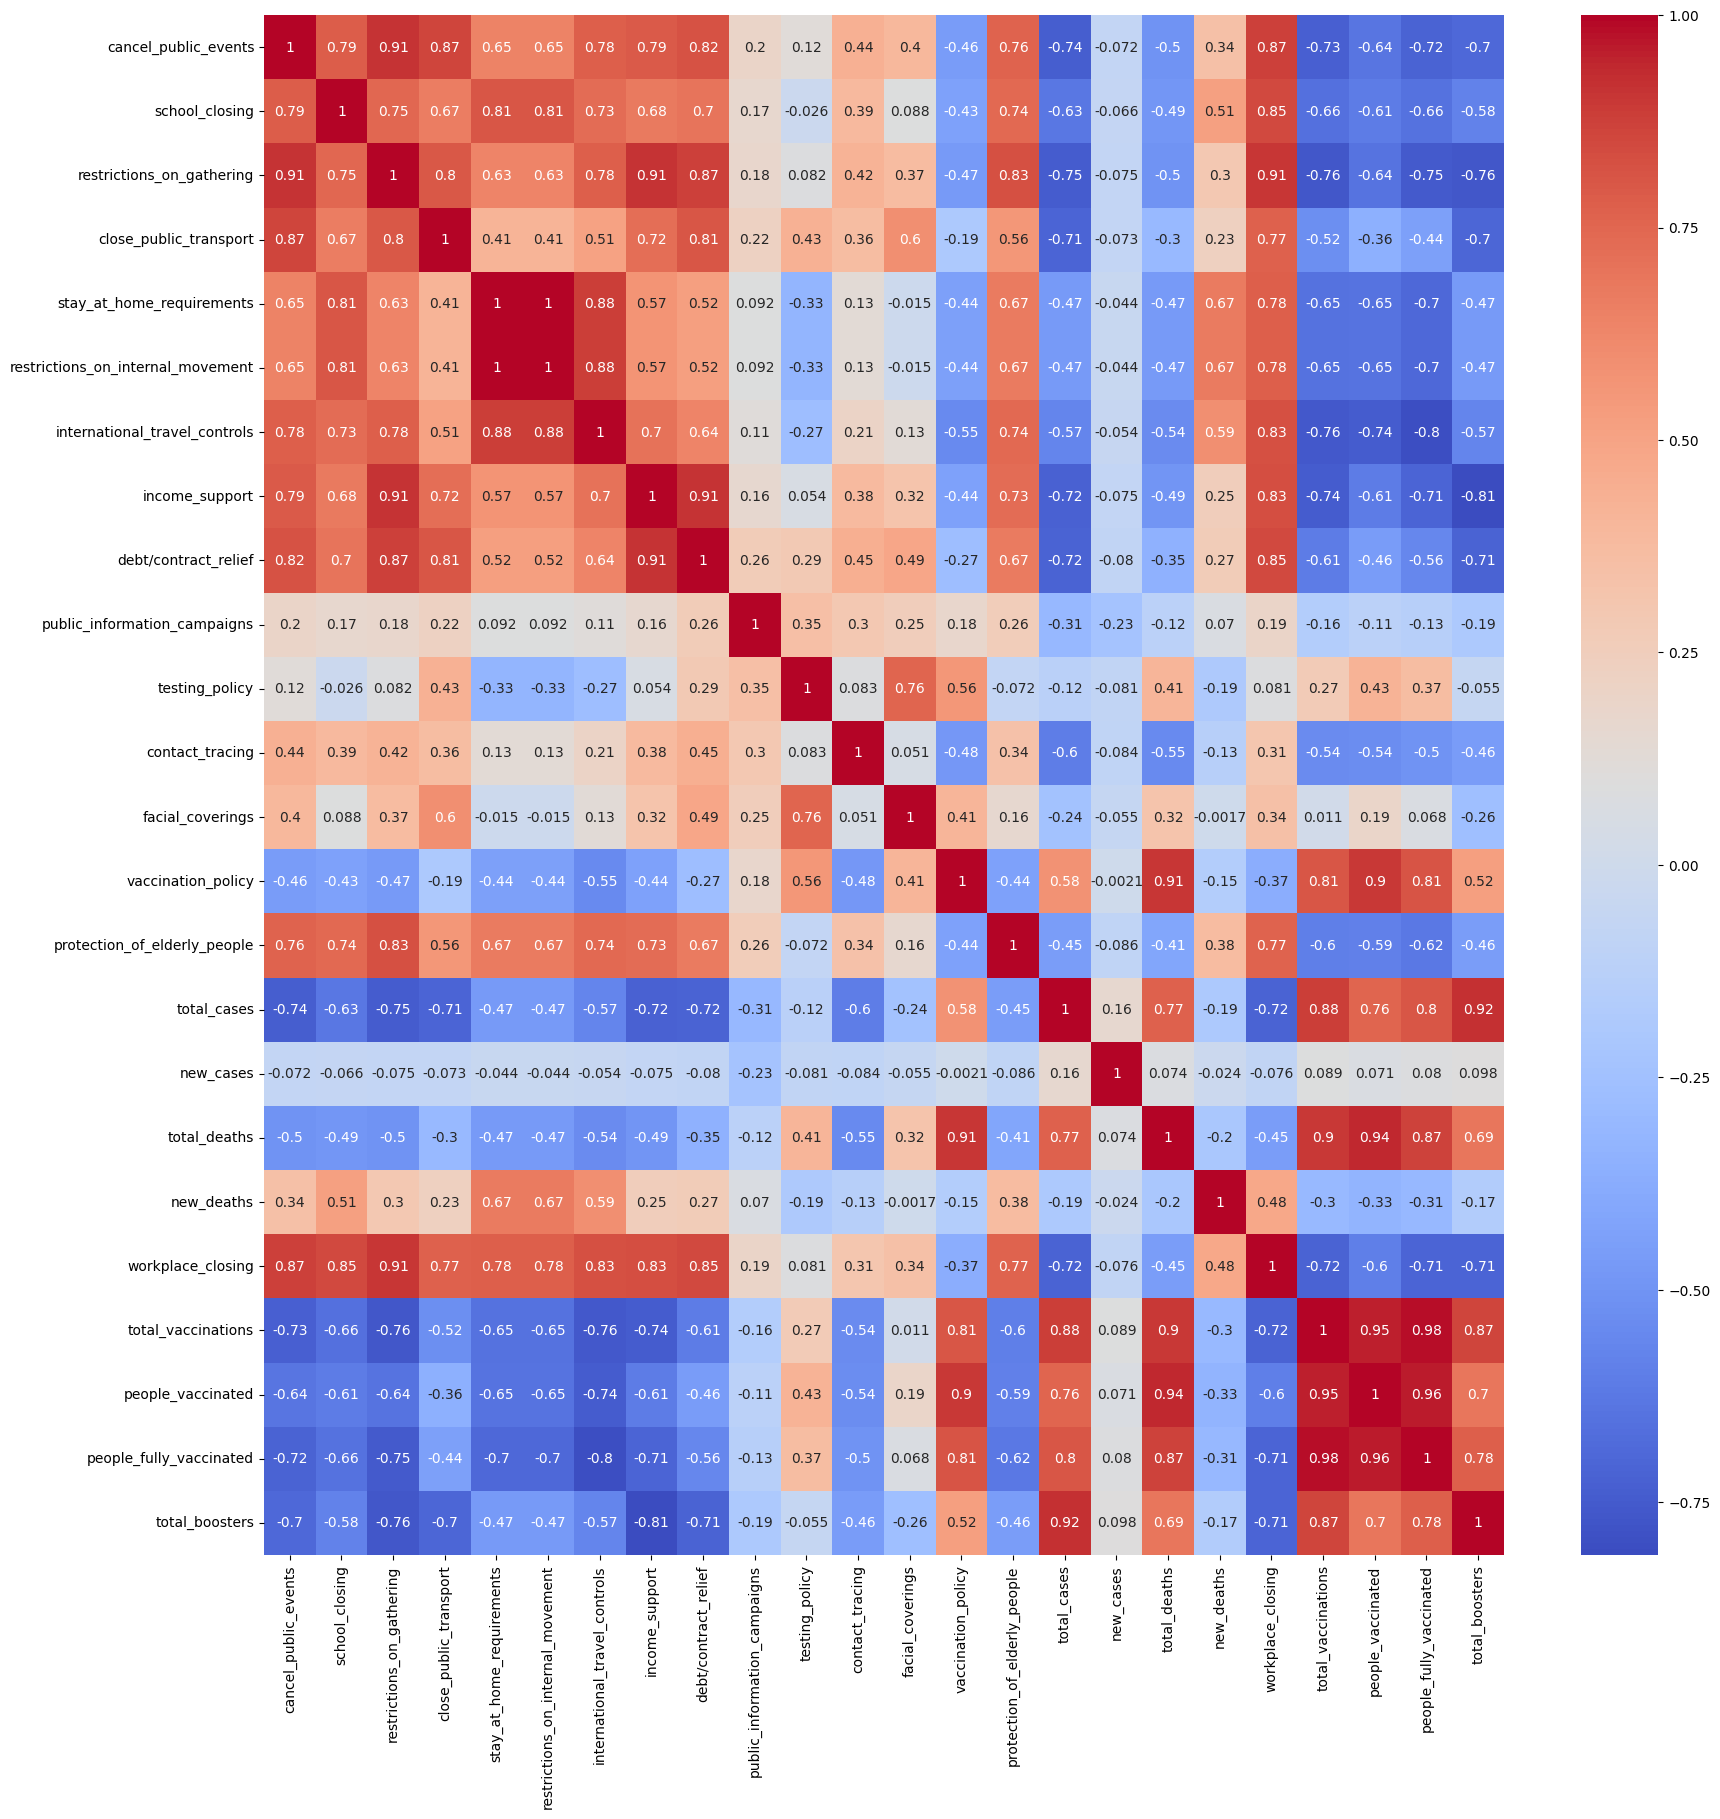

In [10]:
plt.figure(figsize = (20,20))

sns.heatmap(data_indicator.corr(), 
            cmap='coolwarm', 
            annot = True, 
            annot_kws={"size": 10})

In [11]:
data_indicator['day-1']=data_indicator['new_deaths'].shift(periods=1)
data_indicator['day-2']=data_indicator['new_deaths'].shift(periods=2)
data_indicator['day-3']=data_indicator['new_deaths'].shift(periods=3)
data_indicator['day-4']=data_indicator['new_deaths'].shift(periods=4)
data_indicator['day-5']=data_indicator['new_deaths'].shift(periods=5)
data_indicator['day-6']=data_indicator['new_deaths'].shift(periods=6)
data_indicator['day-7']=data_indicator['new_deaths'].shift(periods=7)
data_indicator['day-8']=data_indicator['new_deaths'].shift(periods=8)
data_indicator['day-9']=data_indicator['new_deaths'].shift(periods=9)
data_indicator['day-10']=data_indicator['new_deaths'].shift(periods=10)
data_indicator['day-11']=data_indicator['new_deaths'].shift(periods=11)
data_indicator['day-12']=data_indicator['new_deaths'].shift(periods=12)
data_indicator['day-13']=data_indicator['new_deaths'].shift(periods=13)
data_indicator['day-14']=data_indicator['new_deaths'].shift(periods=14)
data_indicator['day-15']=data_indicator['new_deaths'].shift(periods=15)

In [12]:
data_indicator.columns

Index(['cancel_public_events', 'school_closing', 'restrictions_on_gathering',
       'close_public_transport', 'stay_at_home_requirements',
       'restrictions_on_internal_movement', 'international_travel_controls',
       'income_support', 'debt/contract_relief',
       'public_information_campaigns', 'testing_policy', 'contact_tracing',
       'facial_coverings', 'vaccination_policy',
       'protection_of_elderly_people', 'total_cases', 'new_cases',
       'total_deaths', 'new_deaths', 'workplace_closing', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'day-1', 'day-2', 'day-3', 'day-4', 'day-5', 'day-6', 'day-7', 'day-8',
       'day-9', 'day-10', 'day-11', 'day-12', 'day-13', 'day-14', 'day-15'],
      dtype='object')

In [13]:
data_indicator = data_indicator.fillna(0)

In [14]:
data_indicator.head()

cancel_public_events  school_closing  restrictions_on_gathering  \
date                                                                          
2020-01-30                   0.0             0.0                        0.0   
2020-01-31                   0.0             0.0                        0.0   
2020-02-01                   0.0             0.0                        0.0   
2020-02-02                   0.0             0.0                        0.0   
2020-02-03                   0.0             0.0                        0.0   

            close_public_transport  stay_at_home_requirements  \
date                                                            
2020-01-30                     0.0                        0.0   
2020-01-31                     0.0                        0.0   
2020-02-01                     0.0                        0.0   
2020-02-02                     0.0                        0.0   
2020-02-03                     0.0                        0.0   

            restrictions_on_internal_movement  international_travel_controls  \
date                                                                           
2020-01-30                                0.0                            0.0   
2020-01-31                                0.0                            0.0   
2020-02-01                                0.0                            0.0   
2020-02-02                                0.0                            0.0   
2020-02-03                                0.0                            0.0   

            income_support  debt/contract_relief  \
date                                               
2020-01-30             0.0                   0.0   
2020-01-31             0.0                   0.0   
2020-02-01             0.0                   0.0   
2020-02-02             0.0                   0.0   
2020-02-03             0.0                   0.0   

            public_information_campaigns  ...  day-6  day-7  day-8  day-9  \
date                                      ...                               
2020-01-30                           1.0  ...    0.0    0.0    0.0    0.0   
2020-01-31                           1.0  ...    0.0    0.0    0.0    0.0   
2020-02-01                           1.0  ...    0.0    0.0    0.0    0.0   
2020-02-02                           2.0  ...    0.0    0.0    0.0    0.0   
2020-02-03                           2.0  ...    0.0    0.0    0.0    0.0   

            day-10  day-11  day-12  day-13  day-14  day-15  
date                                                        
2020-01-30     0.0     0.0     0.0     0.0     0.0     0.0  
2020-01-31     0.0     0.0     0.0     0.0     0.0     0.0  
2020-02-01     0.0     0.0     0.0     0.0     0.0     0.0  
2020-02-02     0.0     0.0     0.0     0.0     0.0     0.0  
2020-02-03     0.0     0.0     0.0     0.0     0.0     0.0  

[5 rows x 39 columns]

In [15]:
X=data_indicator.drop(columns=['total_deaths','new_deaths','total_cases'])

In [16]:
X.head()

cancel_public_events  school_closing  restrictions_on_gathering  \
date                                                                          
2020-01-30                   0.0             0.0                        0.0   
2020-01-31                   0.0             0.0                        0.0   
2020-02-01                   0.0             0.0                        0.0   
2020-02-02                   0.0             0.0                        0.0   
2020-02-03                   0.0             0.0                        0.0   

            close_public_transport  stay_at_home_requirements  \
date                                                            
2020-01-30                     0.0                        0.0   
2020-01-31                     0.0                        0.0   
2020-02-01                     0.0                        0.0   
2020-02-02                     0.0                        0.0   
2020-02-03                     0.0                        0.0   

            restrictions_on_internal_movement  international_travel_controls  \
date                                                                           
2020-01-30                                0.0                            0.0   
2020-01-31                                0.0                            0.0   
2020-02-01                                0.0                            0.0   
2020-02-02                                0.0                            0.0   
2020-02-03                                0.0                            0.0   

            income_support  debt/contract_relief  \
date                                               
2020-01-30             0.0                   0.0   
2020-01-31             0.0                   0.0   
2020-02-01             0.0                   0.0   
2020-02-02             0.0                   0.0   
2020-02-03             0.0                   0.0   

            public_information_campaigns  ...  day-6  day-7  day-8  day-9  \
date                                      ...                               
2020-01-30                           1.0  ...    0.0    0.0    0.0    0.0   
2020-01-31                           1.0  ...    0.0    0.0    0.0    0.0   
2020-02-01                           1.0  ...    0.0    0.0    0.0    0.0   
2020-02-02                           2.0  ...    0.0    0.0    0.0    0.0   
2020-02-03                           2.0  ...    0.0    0.0    0.0    0.0   

            day-10  day-11  day-12  day-13  day-14  day-15  
date                                                        
2020-01-30     0.0     0.0     0.0     0.0     0.0     0.0  
2020-01-31     0.0     0.0     0.0     0.0     0.0     0.0  
2020-02-01     0.0     0.0     0.0     0.0     0.0     0.0  
2020-02-02     0.0     0.0     0.0     0.0     0.0     0.0  
2020-02-03     0.0     0.0     0.0     0.0     0.0     0.0  

[5 rows x 36 columns]

In [17]:
y=data_indicator['new_deaths']
y

date
2020-01-30       1.0
2020-01-31       0.0
2020-02-01       0.0
2020-02-02       1.0
2020-02-03       0.0
               ...  
2022-08-27       0.0
2022-08-28       0.0
2022-08-29       0.0
2022-08-30       0.0
2022-08-31    1045.0
Name: new_deaths, Length: 945, dtype: float64

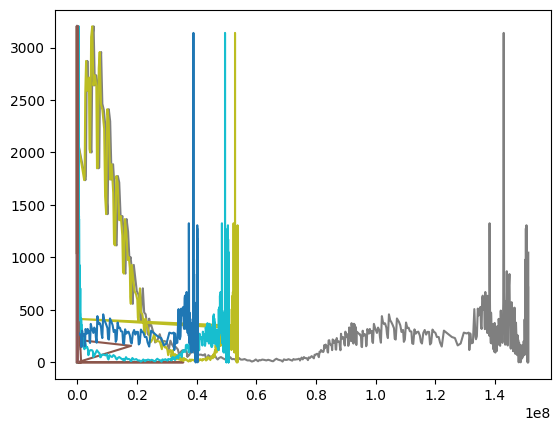

In [18]:
#plt.plot(X['cancel_public_events'],y)
#plt.plot(X['close_public_transport'],y)
plt.plot(X,y)

In [19]:
scaler = MinMaxScaler()

In [20]:
scaler.fit(X)

MinMaxScaler()

In [21]:
X_scale=scaler.transform(X)

In [22]:
X_scale

array([[0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       ...,
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.2795128, 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.0062461, 0.2795128,
        0.       ]])

In [23]:
X_scale.shape

(945, 36)

In [24]:
y.shape

(945,)

In [25]:
X_train=X_scale[:761]
X_test=X_scale[761:]

In [26]:
y_train=y[:761]
y_test=y[761:]

Text(0.5, 0, 'Date')

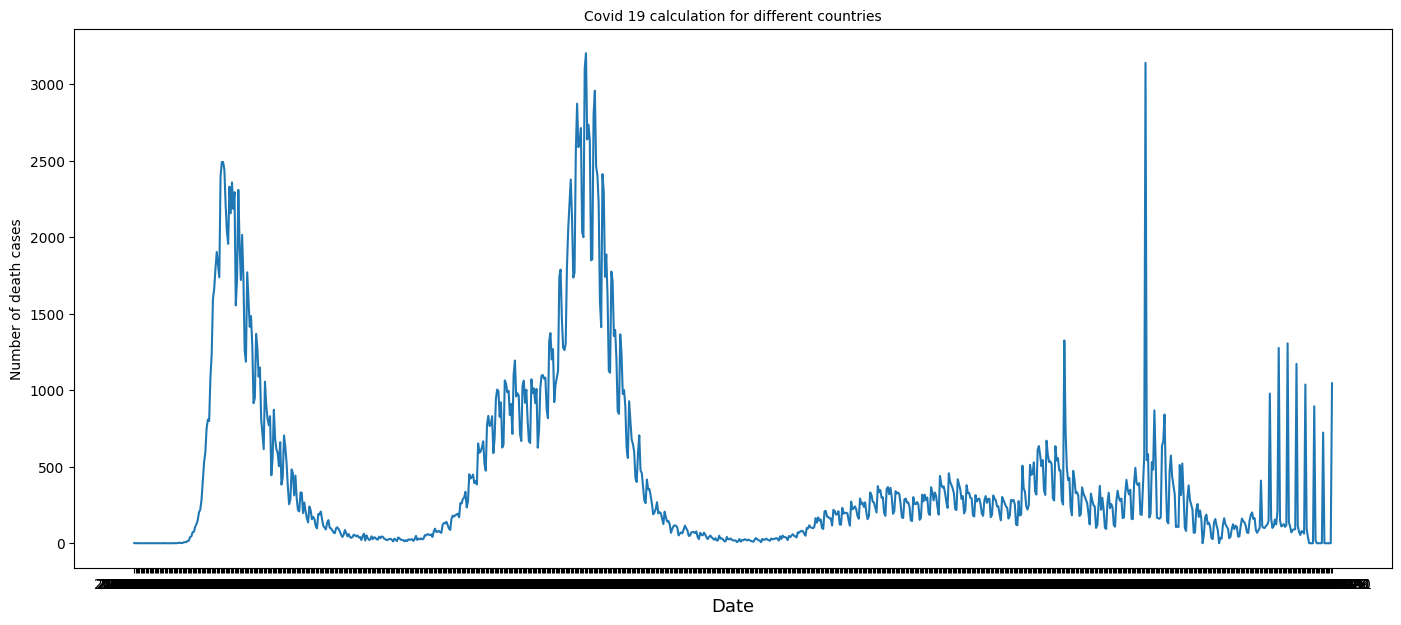

In [27]:
fig, ax = plt.subplots(1, figsize=(17,7))
plt.plot(data_indicator.index,y);
ax.set_title("Covid 19 calculation for different countries", size=10)
ax.set_ylabel("Number of death cases", size=10)
ax.set_xlabel("Date", size=13)

Text(0.5, 0, 'Date')

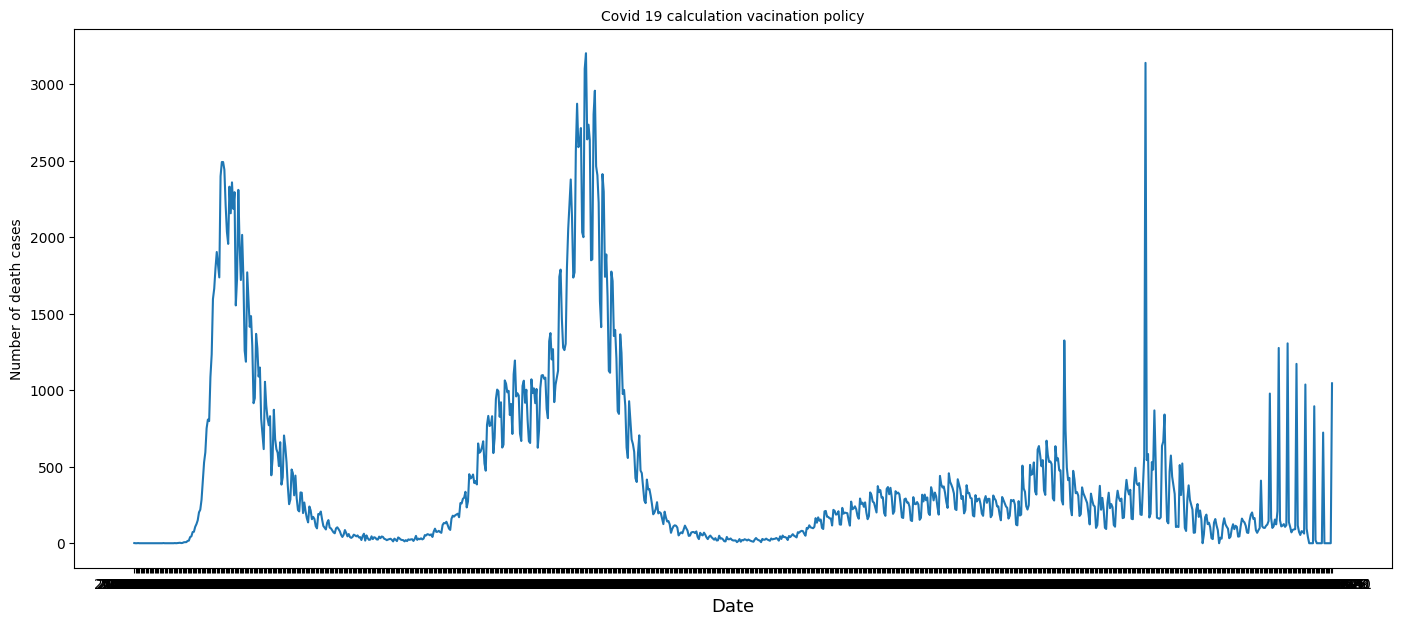

In [28]:
fig, ax = plt.subplots(1, figsize=(17,7))
plt.plot(data_indicator.index,y);
ax.set_title("Covid 19 calculation vacination policy", size=10)
ax.set_ylabel("Number of death cases", size=10)
ax.set_xlabel("Date", size=13)

/home/sumedha/.pyenv/versions/lewagon/envs/covid_tsp_env/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning:

divide by zero encountered in log



Text(0.5, 0, 'log(total_death)')

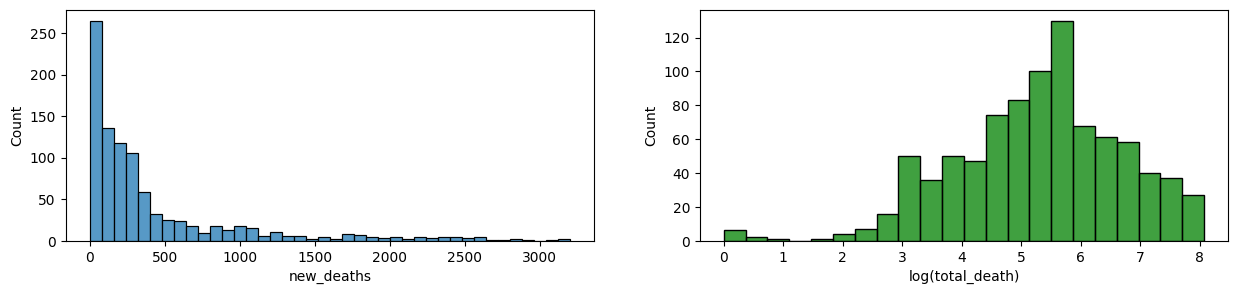

In [117]:
y_log = np.log(y)
plt.figure(figsize=(15,3))
plt.subplot(1,2,1)
sns.histplot(y)
plt.subplot(1,2,2)
sns.histplot(y_log, color='green')
plt.xlabel("log(total_death)")

In [34]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=data_indicator.index,y=data_indicator['new_deaths'],mode='lines+markers',name='total deaths'))
fig.update_layout(title="Growth of death cases in UK",xaxis_title="Date",yaxis_title="Number of deaths",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()
#fig.add_trace(go.Scatter(x=data_indicator.index, y=data_indicator["total_cases"],mode='lines+markers',name='confirmed cases'))



In [33]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=data_indicator.index, y=data_indicator["new_deaths"],mode='lines+markers',name='confirmed cases'))
fig.update_layout(title="Growth of total Covid-19 cases in UK",xaxis_title="Date",yaxis_title="Number of Covid-19 cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

In [137]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=data_indicator["school_closing"], y=data_indicator["new_deaths"],mode='lines+markers',name='confirmed cases'))
fig.update_layout(title="Growth of total Covid-19 cases in UK",xaxis_title="school-closing",yaxis_title="Number of Covid-19 cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

In [31]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=data_indicator["people_fully_vaccinated"], y=data_indicator["new_deaths"],
                    mode='lines+markers',
                    name='death_cases'))
fig.update_layout(title="Growth of different types of death cases in UK",
                 xaxis_title="fully vacinated",yaxis_title="Number of Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

# splitting data

In [39]:
X.shape

(945, 36)

In [40]:
y.shape

(945,)

In [41]:
X_train=X[:756]
X_test=X[756:]

In [42]:
y_train=y[:756]
y_test=y[756:]

# 'Decision tree model'

In [43]:
regressor = DecisionTreeRegressor(random_state=0)
#score_baseline = cross_val_score(regressor, X_train, y_train, cv=5, scoring='r2').mean()
#score_baseline
regressor.fit(X_train,y_train)
y_pred=regressor.predict(X_test)
y_pred

array([ 266.,  231.,  231.,  275.,  179.,  283.,  333.,  183.,  241.,
        123.,  115.,  240.,  283.,  280.,  280.,  232.,  161.,  115.,
        240.,  283.,  280.,  280.,  232.,  200.,  121.,  283.,  359.,
        333.,  336.,  255.,  338.,  166.,  240.,  359.,  329.,  336.,
        359.,  338.,  217.,  241.,  457.,  517., 1903.,  573.,  517.,
        217.,  241.,  517.,  774.,  832.,  517.,  217.,  275.,  240.,
        431.,  921.,  475.,  589.,  612.,  145.,  179., 1325.,  476.,
        543.,  427.,  338.,  166.,  240.,  240.,  365.,  269.,  358.,
        338.,  162.,   71.,  418.,  197.,  457.,  241.,  122.,   71.,
         97.,  283.,  266.,  183.,  232.,  162.,   23.,  100.,  183.,
        150.,  272.,  169.,  162.,   42.,   68.,  275.,  117.,  169.,
         56.,   32.,    6.,   45.,  115.,  169.,  169.,  155.,  208.,
         32.,  100.,  208.,  169.,  208.,  202.,  107.,   38.,  100.,
        164.,  115.,  169.,  155.,  107.,  119.,   71.,  115.,  209.,
        232.,  155.,

In [44]:
y_test

date
2022-02-24     248.0
2022-02-25     240.0
2022-02-26     100.0
2022-02-27     118.0
2022-02-28     242.0
               ...  
2022-08-27       0.0
2022-08-28       0.0
2022-08-29       0.0
2022-08-30       0.0
2022-08-31    1045.0
Name: new_deaths, Length: 189, dtype: float64

In [45]:
y_pred-y_test

date
2022-02-24      18.0
2022-02-25      -9.0
2022-02-26     131.0
2022-02-27     157.0
2022-02-28     -63.0
               ...  
2022-08-27       6.0
2022-08-28       7.0
2022-08-29       7.0
2022-08-30       7.0
2022-08-31   -1038.0
Name: new_deaths, Length: 189, dtype: float64

In [73]:
    mape = np.mean(np.abs(y_pred - y_test)/np.abs(y_test))  # Mean Absolute Percentage Error
    me = np.mean(y_pred - y_test)             # ME
    mae = np.mean(np.abs(y_pred - y_test))

In [47]:
mape=np.mean(np.abs(y_pred - y_test)/np.abs(y_test))
mape

inf

In [48]:
me = np.mean(y_pred - y_test) 
me

2.693121693121693

In [49]:
def forecast_accuracy(y_pred: pd.Series, y_true: pd.Series) -> float:
    
    mape = np.mean(np.abs(y_pred - y_true)/np.abs(y_true))  # Mean Absolute Percentage Error
    me = np.mean(y_pred - y_true)             # ME
    mae = np.mean(np.abs(y_pred - y_true))    # MAE
    mpe = np.mean((y_pred - y_true)/y_true)   # MPE
    rmse = np.mean((y_pred - y_true)**2)**.5  # RMSE
    corr = np.corrcoef(y_pred, y_true)[0,1]   # Correlation between the Actual and the Forecast
    #mins = np.amin(np.hstack([y_pred.reshape(-1,1), y_true.reshape(-1,1)]), axis=1)
    #maxs = np.amax(np.hstack([y_pred.reshape(-1,1), y_true.reshape(-1,1)]), axis=1)
    #minmax = 1 - np.mean(mins/maxs)             # minmax
    #acf1 = acf(y_pred-y_true, fft=False)[1]                      # Lag 1 Autocorrelation of Error
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 
            'corr':corr})

In [50]:
forecast_accuracy(y_pred,y_test)

{'mape': inf,
 'me': 2.693121693121693,
 'mae': 153.58201058201058,
 'mpe': inf,
 'rmse': 331.10292681906054,
 'corr': 0.30866604000684456}

In [51]:
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import make_scorer

# This is our metric to minimize
rmsle = make_scorer(lambda y_true, y_pred: mean_squared_log_error(y_true, y_pred)**0.5)

# This is our score to maximize
rmsle_neg = make_scorer(lambda y_true, y_pred: -1 * mean_squared_log_error(y_true, y_pred)**0.5)

# Equivalent formulation
rmsle_neg = make_scorer(
    lambda y_true, y_pred: mean_squared_log_error(y_true, y_pred)**0.5,
    greater_is_better=False
)

# Ridge model

In [81]:
model = Ridge(alpha=10)
#pipe_ridge = make_pipeline(preproc, model, memory=cachedir)
clf=model.fit(X_train, y_train)
#cross_val_score(model, X_train, y_train, cv=5, scoring=rmsle).mean()
y_pred=clf.predict(X_test)
y_pred

array([ 2.33870747e+02,  2.50816868e+02,  2.16382754e+02,  7.87194204e+01,
        1.30209754e+02,  2.76634041e+02,  2.98318648e+02,  2.51582124e+02,
        2.80970015e+02,  1.29080274e+02,  1.13151137e+02,  2.32672592e+02,
        3.53808251e+02,  2.65341143e+02,  2.55426393e+02,  2.35392186e+02,
        1.06520383e+02,  1.22692207e+02,  2.82321063e+02,  3.54094497e+02,
        2.64525118e+02,  3.01556410e+02,  2.59715776e+02,  1.81419758e+02,
        1.67315596e+02,  3.29826902e+02,  6.92007398e+02,  3.38765310e+02,
        3.34745038e+02,  3.11314668e+02,  2.22707708e+02,  1.75583123e+02,
        3.30962084e+02,  3.99596085e+02,  3.79753285e+02,  3.66426187e+02,
        3.73805101e+02,  2.29877871e+02,  1.93425178e+02,  4.03145753e+02,
        4.67752358e+02,  4.28636585e+02,  1.58426725e+03,  5.33099598e+02,
        1.21352742e+03,  4.79322468e+02,  2.97027390e+02,  1.02352827e+03,
        1.65793231e+03,  6.62454404e+02, -1.05226472e+02, -4.32295592e+02,
       -1.26874787e+02,  

In [82]:
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import make_scorer

# This is our metric to minimize
rmsle = make_scorer(lambda y_test, y_pred: mean_squared_log_error(y_test, y_pred)**0.5)


In [54]:
np.mean(y_test-y_pred)

-60.49587600613082

In [83]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(y_test, y_pred))

In [84]:
rms

406.1296549991834

In [86]:
rmse=np.sqrt(((y_pred - y_test) ** 2).mean())

In [87]:
rmse

406.1296549991834

In [88]:
y_pred.mean()

279.0722981906746

In [89]:
y_test.mean()

240.97354497354496

In [90]:
y_pred-y_test

date
2022-02-24     -14.129253
2022-02-25      10.816868
2022-02-26     116.382754
2022-02-27     -39.280580
2022-02-28    -111.790246
                 ...     
2022-08-27      -2.538200
2022-08-28     -71.230515
2022-08-29    3472.273089
2022-08-30     115.399883
2022-08-31    -594.503251
Name: new_deaths, Length: 189, dtype: float64

In [91]:
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import make_scorer

# This is our metric to minimize
rmsle = make_scorer(lambda y_test, y_pred: mean_squared_log_error(y_test, y_pred)**0.5)

# This is our score to maximize
rmsle_neg = make_scorer(lambda y_test, y_pred: -1 * mean_squared_log_error(y_est, y_pred)**0.5)

# Equivalent formulation
rmsle_neg = make_scorer(
    lambda y_true, y_pred: mean_squared_log_error(y_test, y_pred)**0.5,
    greater_is_better=False
)

In [94]:
parameters = {'alpha':[1, 10]}
Ridge_reg= GridSearchCV(model, parameters, scoring='neg_mean_squared_error',cv=5)

In [95]:
Ridge_reg.fit(X_train,y_train)

/home/sumedha/.pyenv/versions/lewagon/envs/covid_tsp_env/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:212: LinAlgWarning:

Ill-conditioned matrix (rcond=5.00055e-19): result may not be accurate.

/home/sumedha/.pyenv/versions/lewagon/envs/covid_tsp_env/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:212: LinAlgWarning:

Ill-conditioned matrix (rcond=5.64127e-19): result may not be accurate.

/home/sumedha/.pyenv/versions/lewagon/envs/covid_tsp_env/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:212: LinAlgWarning:

Ill-conditioned matrix (rcond=2.24328e-18): result may not be accurate.

/home/sumedha/.pyenv/versions/lewagon/envs/covid_tsp_env/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:212: LinAlgWarning:

Ill-conditioned matrix (rcond=3.18299e-18): result may not be accurate.



GridSearchCV(cv=5, estimator=Ridge(alpha=10), param_grid={'alpha': [1, 10]},
             scoring='neg_mean_squared_error')

In [97]:
Ridge_reg.best_estimator_

Ridge(alpha=10)

In [100]:
model_knn = KNeighborsRegressor()
model_knn.fit(X_train,y_train)


KNeighborsRegressor()

In [101]:
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)

In [104]:
grid_knn= GridSearchCV(model_knn, param_grid, cv=5)

In [105]:
grid_knn.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]})

In [106]:
grid_knn.best_estimator_

KNeighborsRegressor(n_neighbors=2)

In [108]:
model_knn = KNeighborsRegressor(n_neighbors=2)
model_knn.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=2)

In [110]:
y_pred=model_knn.predict(X_test)

In [111]:
y_test-y_pred

date
2022-02-24    -54.5
2022-02-25    -62.5
2022-02-26   -202.5
2022-02-27   -184.5
2022-02-28    -60.5
              ...  
2022-08-27   -302.5
2022-08-28   -302.5
2022-08-29   -267.0
2022-08-30   -302.5
2022-08-31    742.5
Name: new_deaths, Length: 189, dtype: float64

## Target total deaths

In [29]:
data = pd.read_csv('../raw_data/out_csv/indicator_UK.csv')

In [30]:
data=data.set_index('date')

In [31]:
data['day-1']=data['total_deaths'].shift(periods=1)
data['day-2']=data['total_deaths'].shift(periods=2)
data['day-3']=data['total_deaths'].shift(periods=3)
data['day-4']=data['total_deaths'].shift(periods=4)
data['day-5']=data['total_deaths'].shift(periods=5)
data['day-6']=data['total_deaths'].shift(periods=6)
data['day-7']=data['total_deaths'].shift(periods=7)
data['day-8']=data['total_deaths'].shift(periods=8)
data['day-9']=data['total_deaths'].shift(periods=9)
data['day-10']=data['total_deaths'].shift(periods=10)
data['day-11']=data['total_deaths'].shift(periods=11)
data['day-12']=data['total_deaths'].shift(periods=12)
data['day-13']=data['total_deaths'].shift(periods=13)
data['day-14']=data['total_deaths'].shift(periods=14)
data['day-15']=data['total_deaths'].shift(periods=15)

In [32]:
data=data.fillna(0)

In [33]:
data.head()

cancel_public_events  school_closing  restrictions_on_gathering  \
date                                                                          
2020-01-30                   0.0             0.0                        0.0   
2020-01-31                   0.0             0.0                        0.0   
2020-02-01                   0.0             0.0                        0.0   
2020-02-02                   0.0             0.0                        0.0   
2020-02-03                   0.0             0.0                        0.0   

            close_public_transport  stay_at_home_requirements  \
date                                                            
2020-01-30                     0.0                        0.0   
2020-01-31                     0.0                        0.0   
2020-02-01                     0.0                        0.0   
2020-02-02                     0.0                        0.0   
2020-02-03                     0.0                        0.0   

            restrictions_on_internal_movement  international_travel_controls  \
date                                                                           
2020-01-30                                0.0                            0.0   
2020-01-31                                0.0                            0.0   
2020-02-01                                0.0                            0.0   
2020-02-02                                0.0                            0.0   
2020-02-03                                0.0                            0.0   

            income_support  debt/contract_relief  \
date                                               
2020-01-30             0.0                   0.0   
2020-01-31             0.0                   0.0   
2020-02-01             0.0                   0.0   
2020-02-02             0.0                   0.0   
2020-02-03             0.0                   0.0   

            public_information_campaigns  ...  day-6  day-7  day-8  day-9  \
date                                      ...                               
2020-01-30                           1.0  ...    0.0    0.0    0.0    0.0   
2020-01-31                           1.0  ...    0.0    0.0    0.0    0.0   
2020-02-01                           1.0  ...    0.0    0.0    0.0    0.0   
2020-02-02                           2.0  ...    0.0    0.0    0.0    0.0   
2020-02-03                           2.0  ...    0.0    0.0    0.0    0.0   

            day-10  day-11  day-12  day-13  day-14  day-15  
date                                                        
2020-01-30     0.0     0.0     0.0     0.0     0.0     0.0  
2020-01-31     0.0     0.0     0.0     0.0     0.0     0.0  
2020-02-01     0.0     0.0     0.0     0.0     0.0     0.0  
2020-02-02     0.0     0.0     0.0     0.0     0.0     0.0  
2020-02-03     0.0     0.0     0.0     0.0     0.0     0.0  

[5 rows x 39 columns]

## splitting data as x and y

In [34]:
X=data.drop(columns=['total_deaths','new_deaths','new_cases'])

In [35]:
y=data['total_deaths']

## scaling data

In [36]:
scaler = MinMaxScaler()
scaler.fit(X)
X=scaler.transform(X)

## splitting into train and test

In [37]:
n = len(X)
X_train = X[0:int(n*0.8)]
X_test=X[int(n*0.8):]
y_train=y[0:int(n*0.8)]
y_test=y[int(n*0.8):]

## Decision tree model

In [38]:
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train,y_train)
y_pred=regressor.predict(X_test)

In [39]:
score=mean_absolute_percentage_error(y_test, y_pred)
score

0.06765176291263804

## Ridge model

In [110]:
model = Ridge(alpha=1)
clf=model.fit(X_train,y_train)
y_pred=clf.predict(X_test)

In [111]:
score=mean_absolute_percentage_error(y_test, y_pred)
score

0.025955757892780908

In [112]:
parameters = {'alpha':[1, 10]}
Ridge_reg= GridSearchCV(model, parameters,cv=5)
Ridge_reg.fit(X_train,y_train)
Ridge_reg.best_estimator_

Ridge(alpha=1)

In [113]:
model_knn = KNeighborsRegressor(n_neighbors=30)
model_knn.fit(X_train,y_train)
y_pred=model_knn.predict(X_test)

In [114]:
score=mean_absolute_percentage_error(y_test, y_pred)
score

0.07458618279432723

In [115]:
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
grid_knn= GridSearchCV(model_knn, param_grid, cv=5)
grid_knn.fit(X_train,y_train)
grid_knn.best_estimator_

KNeighborsRegressor(n_neighbors=30)

## SVR model

In [116]:
model_svm =SVR(C=1, coef0=10, degree=8, epsilon=0.05, gamma='auto', kernel='poly')

In [117]:
model_svm.fit(X_train,y_train)


SVR(C=1, coef0=10, degree=8, epsilon=0.05, gamma='auto', kernel='poly')

In [48]:
param={'kernel' : ('linear', 'poly', 'rbf', 'sigmoid'),'C' : [1,5,10],'degree' : [3,8],'coef0' : [0.01,10,0.5],'gamma' : ('auto','scale')},

grid_search = GridSearchCV(model_svm, param_grid = param, 
                      cv = 2, n_jobs = -1, verbose = 2)
grid_search.fit(X_train,y_train)
grid_search.best_estimator_

Fitting 2 folds for each of 144 candidates, totalling 288 fits
[CV] END .C=1, coef0=0.01, degree=3, gamma=auto, kernel=poly; total time=   0.0s
[CV] END C=1, coef0=0.01, degree=3, gamma=scale, kernel=linear; total time=   0.0s
[CV] END .C=1, coef0=0.01, degree=3, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END C=1, coef0=0.01, degree=8, gamma=auto, kernel=linear; total time=   0.0s
[CV] END ..C=1, coef0=0.01, degree=8, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END C=1, coef0=0.01, degree=8, gamma=scale, kernel=linear; total time=   0.0s
[CV] END C=1, coef0=0.01, degree=8, gamma=scale, kernel=poly; total time=   0.0s
[CV] END .C=1, coef0=10, degree=3, gamma=auto, kernel=linear; total time=   0.0s
[CV] END .C=1, coef0=10, degree=3, gamma=auto, kernel=linear; total time=   0.0s
[CV] END ....C=1, coef0=10, degree=3, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ....C=1, coef0=10, degree=3, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ..C=1, coef0=10, degree=3, gamma

SVR(C=1, coef0=10, degree=8, epsilon=0.05, gamma='auto', kernel='poly')

In [118]:
y_pred_svm=model_svm.predict(X_test)

In [119]:
score=mean_absolute_percentage_error(y_test, y_pred_svm)
score

0.013124074055260674

## Ada boost regressor

In [79]:
model_ada = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=5))
#model_ada.fit(X_train,y_train)
#y_pred=model.predict(X_test)
#model_ada.get_params()

[CV] END C=1, coef0=0.01, degree=3, gamma=auto, kernel=linear; total time=   0.0s
[CV] END ..C=1, coef0=0.01, degree=3, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END C=1, coef0=0.01, degree=3, gamma=auto, kernel=sigmoid; total time=   0.0s
[CV] END C=1, coef0=0.01, degree=3, gamma=scale, kernel=poly; total time=   0.0s
[CV] END C=1, coef0=0.01, degree=3, gamma=scale, kernel=sigmoid; total time=   0.0s
[CV] END .C=1, coef0=0.01, degree=8, gamma=auto, kernel=poly; total time=   0.0s
[CV] END C=1, coef0=0.01, degree=8, gamma=auto, kernel=sigmoid; total time=   0.0s
[CV] END C=1, coef0=0.01, degree=8, gamma=scale, kernel=poly; total time=   0.3s
[CV] END ...C=1, coef0=10, degree=8, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ...C=1, coef0=10, degree=8, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END C=1, coef0=10, degree=8, gamma=scale, kernel=sigmoid; total time=   0.0s
[CV] END C=1, coef0=10, degree=8, gamma=scale, kernel=sigmoid; total time=   0.1s
[CV] END C=1, coef

In [ ]:
param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "n_estimators": [1, 2]
             }

In [389]:
parameters = {'base_estimator__max_depth':[i for i in range(2,11,2)],
              'base_estimator__min_samples_leaf':[5,10],
              'n_estimators':[10,50,250,1000],
              'learning_rate':[0.01,0.1]}
clf = GridSearchCV(model_ada, parameters,cv=2,n_jobs=-1)


In [ ]:
clf.fit(X_train,y_train)

In [ ]:
clf.best_estimator_

In [80]:
model_ada.fit(X_train,y_train)
y_pred_ada=model_ada.predict(X_test)
score=mean_absolute_percentage_error(y_test, y_pred_ada)
score

[CV] END ..C=10, coef0=10, degree=3, gamma=auto, kernel=poly; total time=   0.0s
[CV] END ...C=10, coef0=10, degree=3, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ...C=10, coef0=10, degree=3, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END C=10, coef0=10, degree=3, gamma=auto, kernel=sigmoid; total time=   0.0s
[CV] END C=10, coef0=10, degree=3, gamma=auto, kernel=sigmoid; total time=   0.0s
[CV] END C=10, coef0=10, degree=3, gamma=scale, kernel=linear; total time=   0.0s
[CV] END C=10, coef0=10, degree=3, gamma=scale, kernel=linear; total time=   0.0s
[CV] END .C=10, coef0=10, degree=3, gamma=scale, kernel=poly; total time=   0.0s
[CV] END .C=10, coef0=10, degree=3, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ..C=10, coef0=10, degree=3, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ..C=10, coef0=10, degree=3, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END C=10, coef0=10, degree=3, gamma=scale, kernel=sigmoid; total time=   0.0s
[CV] END C=10, coef0=1

0.06702828730377691

[CV] END C=1, coef0=0.01, degree=3, gamma=auto, kernel=linear; total time=   0.0s
[CV] END ..C=1, coef0=0.01, degree=3, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END C=1, coef0=0.01, degree=3, gamma=auto, kernel=sigmoid; total time=   0.1s
[CV] END C=1, coef0=0.01, degree=3, gamma=scale, kernel=poly; total time=   0.0s
[CV] END C=1, coef0=0.01, degree=3, gamma=scale, kernel=sigmoid; total time=   0.0s
[CV] END ..C=1, coef0=0.01, degree=8, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END C=1, coef0=0.01, degree=8, gamma=scale, kernel=linear; total time=   0.0s
[CV] END C=1, coef0=0.01, degree=8, gamma=scale, kernel=sigmoid; total time=   0.0s
[CV] END C=1, coef0=0.01, degree=8, gamma=scale, kernel=sigmoid; total time=   0.0s
[CV] END C=1, coef0=10, degree=3, gamma=auto, kernel=sigmoid; total time=   0.0s
[CV] END C=1, coef0=10, degree=3, gamma=auto, kernel=sigmoid; total time=   0.0s
[CV] END ...C=1, coef0=10, degree=3, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ...C=

## Gradient boost,Ridge,SVR 

In [81]:
gboost = GradientBoostingRegressor(n_estimators=30)
ridge = Ridge(alpha=1)
svm = SVR(C=1, coef0=10, degree=8, epsilon=0.05, gamma='auto', kernel='poly')
adaboost = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=None))
model = StackingRegressor(
    estimators=[("gboost", gboost),("adaboost", adaboost),("ridge", ridge), ("svm_rbf", svm)],
    
    final_estimator=LinearRegression(),
    cv=5,
    n_jobs=-1
)
model.get_params()

{'cv': 5,
 'estimators': [('gboost', GradientBoostingRegressor(n_estimators=30)),
  ('adaboost', AdaBoostRegressor(base_estimator=DecisionTreeRegressor())),
  ('ridge', Ridge(alpha=1)),
  ('svm_rbf',
   SVR(C=1, coef0=10, degree=8, epsilon=0.05, gamma='auto', kernel='poly'))],
 'final_estimator__copy_X': True,
 'final_estimator__fit_intercept': True,
 'final_estimator__n_jobs': None,
 'final_estimator__normalize': 'deprecated',
 'final_estimator__positive': False,
 'final_estimator': LinearRegression(),
 'n_jobs': -1,
 'passthrough': False,
 'verbose': 0,
 'gboost': GradientBoostingRegressor(n_estimators=30),
 'adaboost': AdaBoostRegressor(base_estimator=DecisionTreeRegressor()),
 'ridge': Ridge(alpha=1),
 'svm_rbf': SVR(C=1, coef0=10, degree=8, epsilon=0.05, gamma='auto', kernel='poly'),
 'gboost__alpha': 0.9,
 'gboost__ccp_alpha': 0.0,
 'gboost__criterion': 'friedman_mse',
 'gboost__init': None,
 'gboost__learning_rate': 0.1,
 'gboost__loss': 'squared_error',
 'gboost__max_depth': 3,

In [83]:
model.fit(X_train,y_train)

StackingRegressor(cv=5,
                  estimators=[('gboost',
                               GradientBoostingRegressor(n_estimators=30)),
                              ('adaboost',
                               AdaBoostRegressor(base_estimator=DecisionTreeRegressor())),
                              ('ridge', Ridge(alpha=1)),
                              ('svm_rbf',
                               SVR(C=1, coef0=10, degree=8, epsilon=0.05,
                                   gamma='auto', kernel='poly'))],
                  final_estimator=LinearRegression(), n_jobs=-1)

In [84]:
y_pred=model.predict(X_test)

In [85]:
score=mean_absolute_percentage_error(y_test, y_pred)
score

0.02274667886807183

In [133]:
y_train_log = np.log(y_train)
y_test_log=np.log(y_test)
model_xgb = XGBRegressor(max_depth=10, n_estimators=110, learning_rate=0.05,n_jobs=-1)
#model_xgb.get_params()

In [127]:
param_grid={
    'max_depth':[5,10,15],
    'n_estimators':[50,75,110],
    'learning_rate':[0.01,0.05],
}

In [130]:

grid_search = GridSearchCV(model_xgb, param_grid = param_grid,cv = 2, n_jobs = -1, verbose = 2)

In [131]:
grid_search.fit(X_train,y_train)

Fitting 2 folds for each of 18 candidates, totalling 36 fits


GridSearchCV(cv=2,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=0.1, max_bin=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=30, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=300,
                                    n_jobs=-1, num_parallel_tree=None,
                                    predictor=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05],
                         'max_depth': [5, 10, 15],
                         'n_estimators': [50, 75, 110]},
             verbose=2)

In [132]:
grid_search.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=110,
             n_jobs=-1, num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0, reg_lambda=1, ...)

In [136]:
grid_search = GridSearchCV(model_xgb, param_grid = param_grid,cv = 2, n_jobs = -1, verbose = 2)
model_xgb.fit(X_train,y_train,)
y_pred_xgb=model_xgb.predict(X_test)

[CV] END ...learning_rate=0.01, max_depth=5, n_estimators=50; total time=   0.4s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=110; total time=   0.4s
[CV] END ..learning_rate=0.01, max_depth=10, n_estimators=75; total time=   0.4s
[CV] END ..learning_rate=0.01, max_depth=15, n_estimators=75; total time=   0.3s
[CV] END .learning_rate=0.01, max_depth=15, n_estimators=110; total time=   0.5s
[CV] END ..learning_rate=0.05, max_depth=5, n_estimators=110; total time=   0.5s
[CV] END .learning_rate=0.05, max_depth=10, n_estimators=110; total time=   0.5s
[CV] END ...learning_rate=0.01, max_depth=5, n_estimators=50; total time=   0.2s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=110; total time=   0.4s
[CV] END ..learning_rate=0.01, max_depth=10, n_estimators=75; total time=   0.4s
[CV] END ..learning_rate=0.01, max_depth=15, n_estimators=75; total time=   0.3s
[CV] END .learning_rate=0.01, max_depth=15, n_estimators=110; total time=   0.5s
[CV] END ..learning_rate=0.0

In [135]:
mape=mean_absolute_percentage_error(y_test, y_pred_xgb)
mape

0.07699698977436423

In [225]:
model_xgb.get_xgb_params

<bound method XGBModel.get_xgb_params of XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=300, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)>

In [ ]:
grid_search = GridSearchCV(model_xgb, param_grid = param_grid,cv = 2, n_jobs = -1, verbose = 2)

## gradient boosting Regressor

In [105]:
model = GradientBoostingRegressor(alpha=0.9, learning_rate=0.1, n_estimators=1000)

In [122]:
parameters = {
    "alpha": [0,0.01,0.5,1],
    "n_estimators":[10,20,50,300,400,700]
    }
grid_search = GridSearchCV(model, param_grid = parameters,cv = 2, n_jobs = -1, verbose = 2)
grid_search.fit(X_train,y_train)

Fitting 2 folds for each of 24 candidates, totalling 48 fits


ValueError: Invalid parameter 'n_estimators' for estimator Ridge(alpha=0). Valid parameters are: ['alpha', 'copy_X', 'fit_intercept', 'max_iter', 'normalize', 'positive', 'random_state', 'solver', 'tol'].

In [ ]:
grid_search.best_estimator_

In [107]:
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
score=mean_absolute_percentage_error(y_test, y_pred)
score

0.059445030232108474

In [124]:
model_forest = RandomForestRegressor(ccp_alpha=0.5, max_depth=8, min_samples_leaf=20,n_estimators=20)
#model_forest.get_params()

In [123]:
params= {
    "ccp_alpha": [0.9,0.5,1],
    "max_depth":[3,5,8,10],
    "n_estimators":[10,20,50,200,300,400,700,1000]
    }
grid_search = GridSearchCV(model_forest, param_grid = params,cv = 2, n_jobs = -1, verbose = 2)
grid_search.fit(X_train,y_train)
grid_search.best_estimator_

Fitting 2 folds for each of 96 candidates, totalling 192 fits


RandomForestRegressor(ccp_alpha=0.5, max_depth=8, min_samples_leaf=20,
                      n_estimators=20)

In [125]:
model_forest.fit(X_train,y_train)
y_pred=model_forest.predict(X_test)
score=mean_absolute_percentage_error(y_test, y_pred)
score

0.07932405000297629

[CV] END ........ccp_alpha=0.9, max_depth=3, n_estimators=10; total time=   0.0s
[CV] END ........ccp_alpha=0.9, max_depth=3, n_estimators=50; total time=   0.1s
[CV] END .......ccp_alpha=0.9, max_depth=3, n_estimators=300; total time=   1.0s
[CV] END .......ccp_alpha=0.9, max_depth=3, n_estimators=700; total time=   2.5s
[CV] END ........ccp_alpha=0.9, max_depth=5, n_estimators=10; total time=   0.0s
[CV] END ........ccp_alpha=0.9, max_depth=5, n_estimators=10; total time=   0.1s
[CV] END ........ccp_alpha=0.9, max_depth=5, n_estimators=20; total time=   0.1s
[CV] END ........ccp_alpha=0.9, max_depth=5, n_estimators=50; total time=   0.2s
[CV] END .......ccp_alpha=0.9, max_depth=5, n_estimators=200; total time=   0.7s
[CV] END .......ccp_alpha=0.9, max_depth=5, n_estimators=300; total time=   1.1s
[CV] END .......ccp_alpha=0.9, max_depth=5, n_estimators=700; total time=   2.9s
[CV] END ........ccp_alpha=0.9, max_depth=8, n_estimators=20; total time=   0.1s
[CV] END ........ccp_alpha=0

[CV] END ........ccp_alpha=0.9, max_depth=3, n_estimators=20; total time=   0.1s
[CV] END .......ccp_alpha=0.9, max_depth=3, n_estimators=200; total time=   0.5s
[CV] END .......ccp_alpha=0.9, max_depth=3, n_estimators=400; total time=   1.4s
[CV] END ......ccp_alpha=0.9, max_depth=3, n_estimators=1000; total time=   3.3s
[CV] END .......ccp_alpha=0.9, max_depth=5, n_estimators=400; total time=   1.6s
[CV] END ......ccp_alpha=0.9, max_depth=5, n_estimators=1000; total time=   3.5s
[CV] END .......ccp_alpha=0.9, max_depth=8, n_estimators=400; total time=   1.5s
[CV] END ......ccp_alpha=0.9, max_depth=8, n_estimators=1000; total time=   3.8s
[CV] END ......ccp_alpha=0.9, max_depth=10, n_estimators=700; total time=   2.9s
[CV] END ........ccp_alpha=0.5, max_depth=3, n_estimators=10; total time=   0.0s
[CV] END ........ccp_alpha=0.5, max_depth=3, n_estimators=10; total time=   0.0s
[CV] END ........ccp_alpha=0.5, max_depth=3, n_estimators=20; total time=   0.1s
[CV] END ........ccp_alpha=0